# Backdoor, Front-door, and Unobserved Confounding

## (1) Backdoor Criterion (Most Common)

Imagine you’re measuring how much education boosts income, but people who are older both:

* have more education (because they’ve had time to get it),
* and earn more (because of work experience).

If you don’t “hold age constant,” you’ll confuse *age-related earning* with *education-related earning*.

Blocking the backdoor (by adjusting for age) ensures you compare people **with the same age** — isolating the true effect of education.

In a causal graph (DAG), a backdoor path is any path from X to Y that starts with an arrow going into X.
That means the path is not the causal one, but a spurious route — a source of confounding.
Goal: Block all backdoor paths (confounding) between treatment and outcome using observed covariates.
Show how adjusting for confounders like `parent_income` and `age` blocks the backdoor path.
That’s a backdoor because it “enters” education through the back (arrow into X).

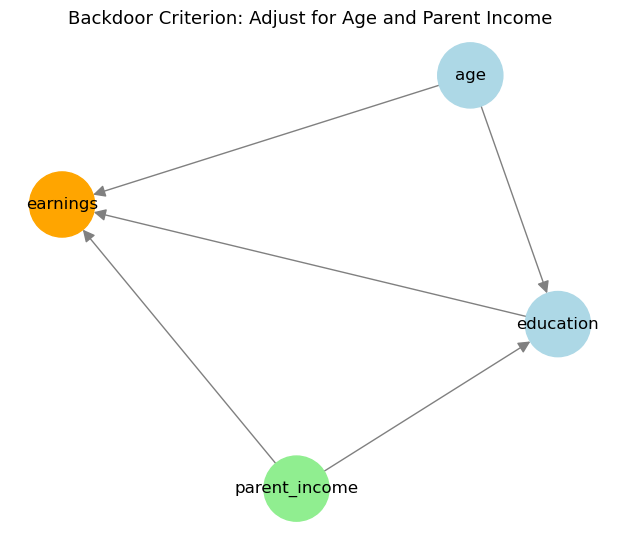

In [73]:
import matplotlib.pyplot as plt
import networkx as nx

# DAG
G1 = nx.DiGraph()
edges1 = [
    ("age", "education"),
    ("parent_income", "education"),
    ("age", "earnings"),
    ("parent_income", "earnings"),
    ("education", "earnings")
]
G1.add_edges_from(edges1)

pos = nx.spring_layout(G1, seed=42)
plt.figure(figsize=(6, 5))
nx.draw(G1, pos, with_labels=True,
        node_color=['lightblue','lightblue','lightgreen','orange'],
        node_size=2200, arrowsize=18, edge_color='gray')
plt.title("Backdoor Criterion: Adjust for Age and Parent Income", fontsize=13)
plt.show()

Here, we want the causal effect:
`education → earnings`

But there’s a **backdoor path**:

```
education ← age → earnings
```

That’s a *backdoor* because it “enters” education through the back (arrow into X).

If we don’t block it, your estimate mixes **two effects**:

1. The true causal effect of education on income, and
2. The spurious association due to age influencing both.

So the regression coefficient or difference in means is *biased*.


**How Do We Block It?**

We **control for** (or condition on) the confounder — in this case, **age**.

Once we adjust for age, we’ve “blocked” that non-causal path.

Mathematically:

$$
P(Y \mid \text{do}(X)) = \sum_{a} P(Y \mid X, A = a) \cdot P(A = a)
$$

This is the backdoor adjustment formula. The formula adjusts for the confounding factors. It does the following:
1. Break the population into groups based on different levels of the confounding factor A (e.g., low, medium, high cognitive ability).
2. For each group, look at the relationship between education (X) and earnings (Y), assuming you know the level of A.
3. Then, average those relationships across all groups, weighted by how common each group is in the population (P(A = a)).

In causal inference, the "do" operator—written as do(X)—is a formal notation introduced by Judea Pearl to represent interventions in a system. It’s used to distinguish between observing a variable and intervening on it.


- $ P(Y \mid \text{do}(X)) $: This is the causal effect of setting X to a specific value on Y. It’s different from just observing X, because it removes the influence of confounding variables.

- $ A $: A confounding variable that affects both X and Y.

- $ P(Y \mid X, A = a) $: This is the conditional probability of Y given X and a specific value of A. It reflects how Y behaves when both X and A are known.

- $ P(A = a) $: This is the marginal probability of the confounder A taking the value a.

This is the **backdoor adjustment formula**.

**Strategies for Backdoor Adjustment**

| Method                            | How It Blocks Backdoor                                     |
| --------------------------------------- | --------------------------------------------------------------- |
| Regression Adjustment               | Include confounders as covariates                               |
| Propensity Score Matching           | Compare treated/untreated units with similar confounder scores  |
| Stratification (Subclassification)  | Estimate effects within confounder or propensity score strata   |
| Inverse Probability Weighting (IPW) | Reweight data to simulate randomization and balance confounders |

If a confounder is unobserved, the causal effect cannot be identified through backdoor adjustment alone — we must rely on other strategies, such as **instrumental variables**, **front-door adjustment**, or **experiments**.

## (2) Frontdoor

**Goal:** Even if an unobserved variable confounds education and earnings, a mediator (`skills`) can identify the effect.

* The **backdoor approach** removes bias by *blocking confounders*.
* The **front-door approach** bypasses unobserved bias by *going through a mediator*.
* Together, they form two core identification tools in causal inference.

Even if an **unobserved variable** (like ability) confounds education and earnings, we can still identify the causal effect of education on income using a **mediator**, such as **skills**.
This is the **front-door criterion** in causal inference.

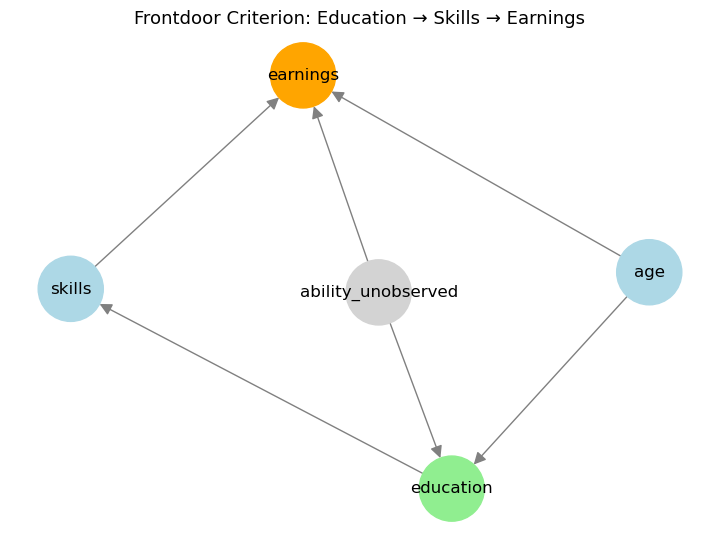

In [75]:
# DAG
G2 = nx.DiGraph()
edges2 = [
    ("age", "education"),
    ("education", "skills"),
    ("skills", "earnings"),
    ("ability_unobserved", "education"),
    ("ability_unobserved", "earnings"),
    ("age", "earnings")
]
G2.add_edges_from(edges2)

pos = nx.spring_layout(G2, seed=42)
plt.figure(figsize=(7, 5))
nx.draw(G2, pos, with_labels=True,
        node_color=['lightblue','lightgreen','lightblue','orange','lightgray'],
        node_size=2200, arrowsize=18, edge_color='gray')
plt.title("Frontdoor Criterion: Education → Skills → Earnings", fontsize=13)
plt.show()

**The Formula:**
$$
P(Y \mid \text{do}(X)) = \sum_{m} P(M \mid X) \sum_{x'} P(Y \mid M, X') \cdot P(X')
$$

**What the Formula Does:**

1. First, it looks at how the intervention on X affects the mediator M. That’s the term $ P(M \mid X) $.
2. Second, it looks at how M and different possible values of X (denoted X') together affect Y. That’s the inner sum: $ \sum_{x'} P(Y \mid M, X') \cdot P(X') $.
3. Finally, it combines these two steps across all possible values of M to get the overall effect of doing X on Y.

**The Key Front-door Conditions**

We can identify the causal effect of education on income **through the mediator** if:

1. All direct paths from education to earnings are blocked except through skills.
   (No direct education → earnings link after skills.)

2. All confounding paths from skills to earnings are blocked by controlling for education.
   (No variable influences both skills and earnings, once we account for education.)

If these hold, the front-door adjustment works. 
In other words, even if “ability” (unobserved) biases both education and earnings, it does not confound the effect of:

* education → skills, nor
* skills → earnings (after controlling for education).

## (3) Unobserved Confounding

**Goal:** Demonstrate when causal effect is **not identifiable** due to unobserved confounding.

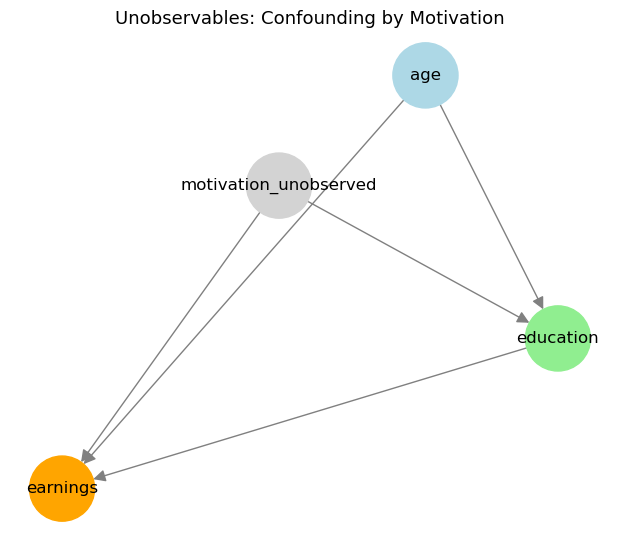

In [77]:
# DAG
G3 = nx.DiGraph()
edges3 = [
    ("age", "education"),
    ("age", "earnings"),
    ("motivation_unobserved", "education"),
    ("motivation_unobserved", "earnings"),
    ("education", "earnings")
]
G3.add_edges_from(edges3)

pos = nx.spring_layout(G3, seed=42)
plt.figure(figsize=(6, 5))
nx.draw(G3, pos, with_labels=True,
        node_color=['lightblue','lightgreen','orange','lightgray'],
        node_size=2200, arrowsize=18, edge_color='gray')
plt.title("Unobservables: Confounding by Motivation", fontsize=13)
plt.show()

**Explanation:**

* `motivation_unobserved` affects both `education` and `income`.
* Since it’s **unobserved**, no variable can block the backdoor path.
* The causal effect of `education` on `income` is **not identifiable**.

## Paper
- Potential Outcome and Directed Acyclic Graph Approaches to Causality: Relevance for Empirical Practice in Economics by Guido W. Imbens, published in the Journal of Economic Literature (Vol 58, No 4, December 2020).

### (1) Backdoor

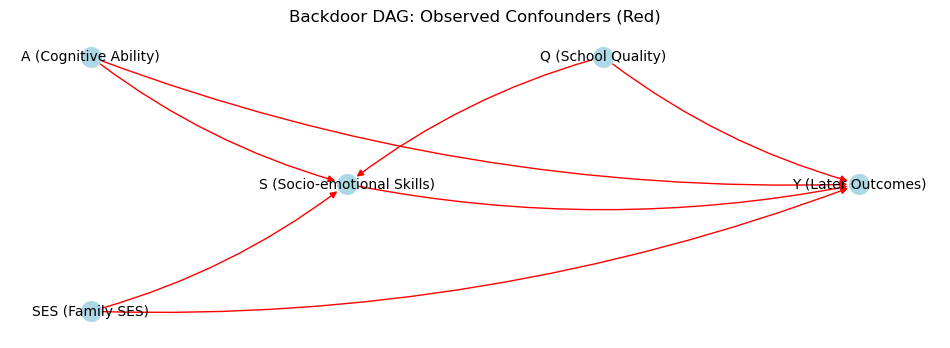

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Backdoor DAG
G = nx.DiGraph()

nodes = ["S (Socio-emotional Skills)", "Y (Later Outcomes)",
         "A (Cognitive Ability)", "SES (Family SES)", "Q (School Quality)"]
G.add_nodes_from(nodes)

edges = [
    ("A (Cognitive Ability)", "S (Socio-emotional Skills)"),
    ("A (Cognitive Ability)", "Y (Later Outcomes)"),
    ("SES (Family SES)", "S (Socio-emotional Skills)"),
    ("SES (Family SES)", "Y (Later Outcomes)"),
    ("Q (School Quality)", "S (Socio-emotional Skills)"),
    ("Q (School Quality)", "Y (Later Outcomes)"),
    ("S (Socio-emotional Skills)", "Y (Later Outcomes)")
]
G.add_edges_from(edges)

pos = {
    "A (Cognitive Ability)": (-1,2),
    "SES (Family SES)": (-1,-2),
    "Q (School Quality)": (1,2),
    "S (Socio-emotional Skills)": (0,0),
    "Y (Later Outcomes)": (2,0)
}

plt.figure(figsize=(12,4))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=200)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=1,
                       connectionstyle='arc3,rad=0.1')
plt.title("Backdoor DAG: Observed Confounders (Red)")
plt.axis('off')
plt.show()


### (2) Frontdoor

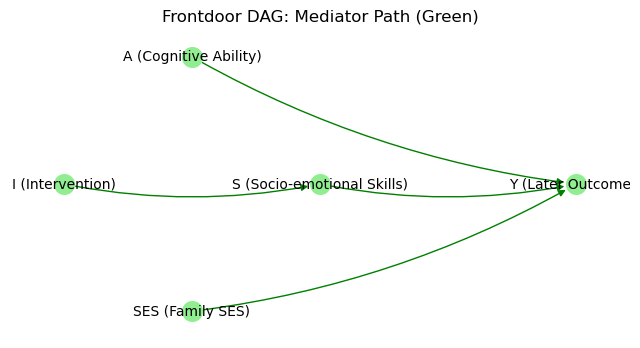

In [57]:
# Frontdoor DAG
G = nx.DiGraph()

nodes = ["I (Intervention)", "S (Socio-emotional Skills)", "Y (Later Outcomes)",
         "A (Cognitive Ability)", "SES (Family SES)"]
G.add_nodes_from(nodes)

edges = [
    ("I (Intervention)", "S (Socio-emotional Skills)"),
    ("S (Socio-emotional Skills)", "Y (Later Outcomes)"),
    ("A (Cognitive Ability)", "Y (Later Outcomes)"),
    ("SES (Family SES)", "Y (Later Outcomes)")
]
G.add_edges_from(edges)

pos = {
    "I (Intervention)": (-2,0),
    "S (Socio-emotional Skills)": (0,0),
    "Y (Later Outcomes)": (2,0),
    "A (Cognitive Ability)": (-1,2),
    "SES (Family SES)": (-1,-2)
}

plt.figure(figsize=(8,4))
nx.draw_networkx_nodes(G, pos, node_color="lightgreen", node_size=200)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=1,
                       connectionstyle='arc3,rad=0.1')
plt.title("Frontdoor DAG: Mediator Path (Green)")
plt.axis('off')
plt.show()


### (3) Unobserved confounding

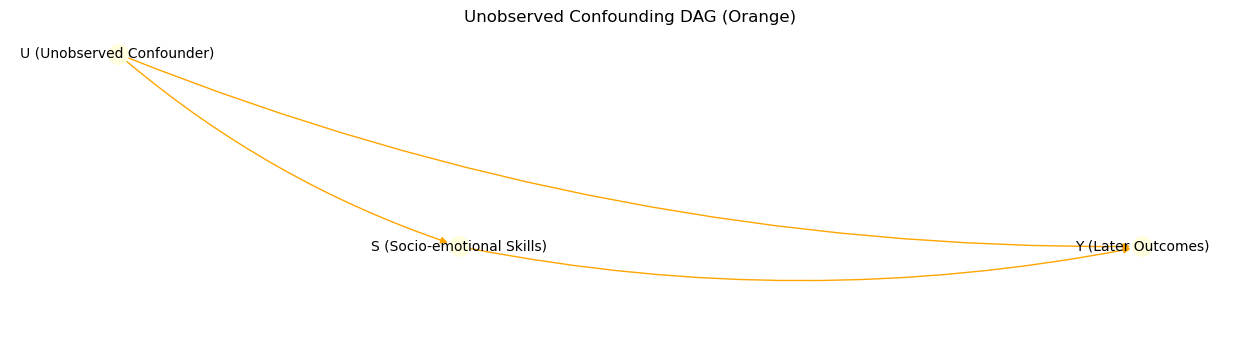

In [62]:
# Unobserved Confounder DAG
G = nx.DiGraph()

nodes = ["S (Socio-emotional Skills)", "Y (Later Outcomes)", "U (Unobserved Confounder)"]
G.add_nodes_from(nodes)

edges = [
    ("S (Socio-emotional Skills)", "Y (Later Outcomes)"),
    ("U (Unobserved Confounder)", "S (Socio-emotional Skills)"),
    ("U (Unobserved Confounder)", "Y (Later Outcomes)")
]
G.add_edges_from(edges)

pos = {
    "U (Unobserved Confounder)": (-1,1),
    "S (Socio-emotional Skills)": (0,0),
    "Y (Later Outcomes)": (2,0)
}

plt.figure(figsize=(16,4))
nx.draw_networkx_nodes(G, pos, node_color="lightyellow", node_size=200)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='orange',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=1,
                       connectionstyle='arc3,rad=0.1')
plt.title("Unobserved Confounding DAG (Orange)")
plt.axis('off')
plt.show()

### Putting all together

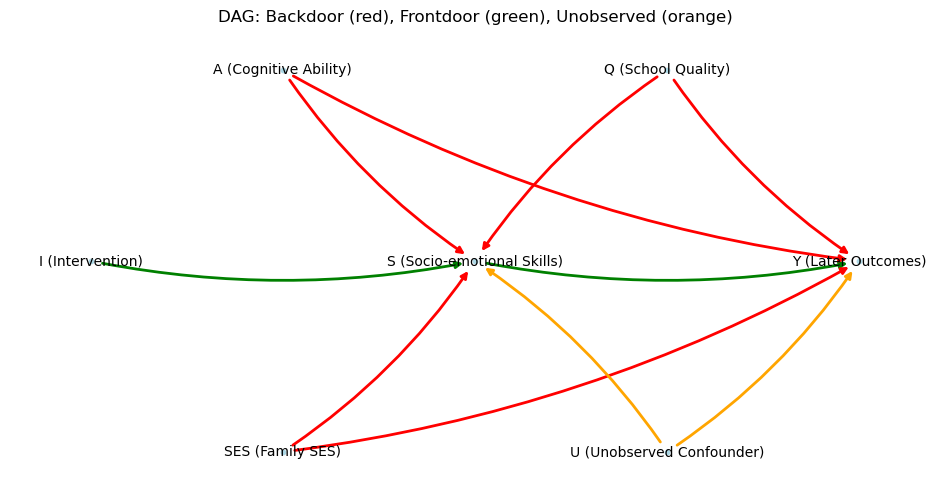

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Nodes
nodes = [
    "I (Intervention)", 
    "S (Socio-emotional Skills)", 
    "Y (Later Outcomes)",
    "A (Cognitive Ability)", 
    "SES (Family SES)", 
    "Q (School Quality)", 
    "U (Unobserved Confounder)"
]
G.add_nodes_from(nodes)

# Edges by type
frontdoor_edges = [("I (Intervention)", "S (Socio-emotional Skills)"),
                   ("S (Socio-emotional Skills)", "Y (Later Outcomes)")]
backdoor_edges = [("A (Cognitive Ability)", "S (Socio-emotional Skills)"),
                  ("A (Cognitive Ability)", "Y (Later Outcomes)"),
                  ("SES (Family SES)", "S (Socio-emotional Skills)"),
                  ("SES (Family SES)", "Y (Later Outcomes)"),
                  ("Q (School Quality)", "S (Socio-emotional Skills)"),
                  ("Q (School Quality)", "Y (Later Outcomes)")]
unobserved_edges = [("U (Unobserved Confounder)", "S (Socio-emotional Skills)"),
                    ("U (Unobserved Confounder)", "Y (Later Outcomes)")]

# Positions for clarity
pos = {
    "I (Intervention)": (-2,0),
    "S (Socio-emotional Skills)": (0,0),
    "Y (Later Outcomes)": (2,0),
    "A (Cognitive Ability)": (-1,2),
    "SES (Family SES)": (-1,-2),
    "Q (School Quality)": (1,2),
    "U (Unobserved Confounder)": (1,-2)
}

plt.figure(figsize=(12,6))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=10)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=frontdoor_edges, edge_color='green',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_edges(G, pos, edgelist=backdoor_edges, edge_color='red',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_edges(G, pos, edgelist=unobserved_edges, edge_color='orange',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.1')

plt.title("DAG: Backdoor (red), Frontdoor (green), Unobserved (orange)")
plt.axis('off')
plt.show()


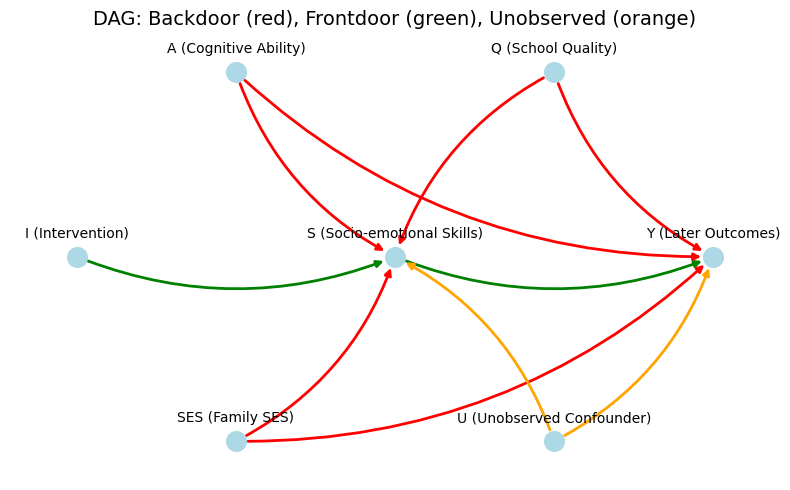

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Nodes
nodes = [
    "I (Intervention)", 
    "S (Socio-emotional Skills)", 
    "Y (Later Outcomes)",
    "A (Cognitive Ability)", 
    "SES (Family SES)", 
    "Q (School Quality)", 
    "U (Unobserved Confounder)"
]
G.add_nodes_from(nodes)

# Edges by type
frontdoor_edges = [("I (Intervention)", "S (Socio-emotional Skills)"),
                   ("S (Socio-emotional Skills)", "Y (Later Outcomes)")]
backdoor_edges = [("A (Cognitive Ability)", "S (Socio-emotional Skills)"),
                  ("A (Cognitive Ability)", "Y (Later Outcomes)"),
                  ("SES (Family SES)", "S (Socio-emotional Skills)"),
                  ("SES (Family SES)", "Y (Later Outcomes)"),
                  ("Q (School Quality)", "S (Socio-emotional Skills)"),
                  ("Q (School Quality)", "Y (Later Outcomes)")]
unobserved_edges = [("U (Unobserved Confounder)", "S (Socio-emotional Skills)"),
                    ("U (Unobserved Confounder)", "Y (Later Outcomes)")]

# Positions for clarity
pos = {
    "I (Intervention)": (-2,0),
    "S (Socio-emotional Skills)": (0,0),
    "Y (Later Outcomes)": (2,0),
    "A (Cognitive Ability)": (-1,2),
    "SES (Family SES)": (-1,-2),
    "Q (School Quality)": (1,2),
    "U (Unobserved Confounder)": (1,-2)
}

plt.figure(figsize=(8,5))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=200)

# Draw labels slightly above the nodes to avoid overlap
label_pos = {k: (x, y + 0.25) for k, (x, y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=10)

# Draw edges with arrows and curvature to avoid label overlap
nx.draw_networkx_edges(G, pos, edgelist=frontdoor_edges, edge_color='green',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.2')
nx.draw_networkx_edges(G, pos, edgelist=backdoor_edges, edge_color='red',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.2')
nx.draw_networkx_edges(G, pos, edgelist=unobserved_edges, edge_color='orange',
                       arrows=True, arrowstyle='-|>', arrowsize=10, width=2, connectionstyle='arc3,rad=0.2')

plt.title("DAG: Backdoor (red), Frontdoor (green), Unobserved (orange)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("dag_diagram.png")
plt.show()